# Clusterization of Differences

In [1]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns

In [2]:
calm, frust = calm.values, frust.values
delta = frust - calm

In [3]:
from sklearn.preprocessing import scale
delta =scale(delta)

## Visualization

(101, 198)


<IPython.core.display.Javascript object>


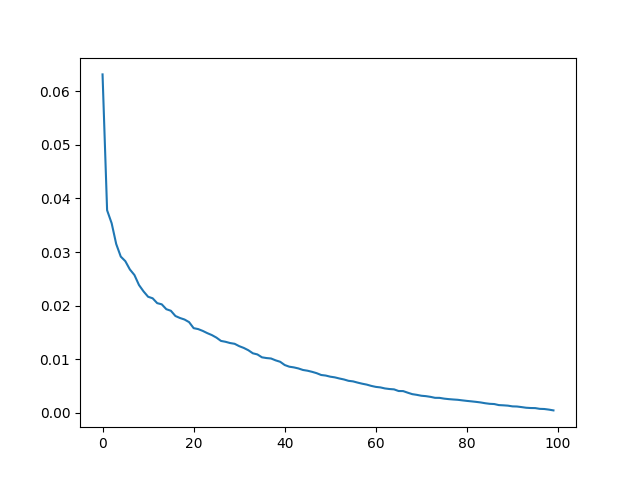

In [4]:
from sklearn.decomposition import PCA
print(delta.shape)
pca = PCA(100).fit(delta)
y = pca.explained_variance_ratio_
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i in range(len(y))], y)
#keys[pca.mean_.argmax()]

<IPython.core.display.Javascript object>


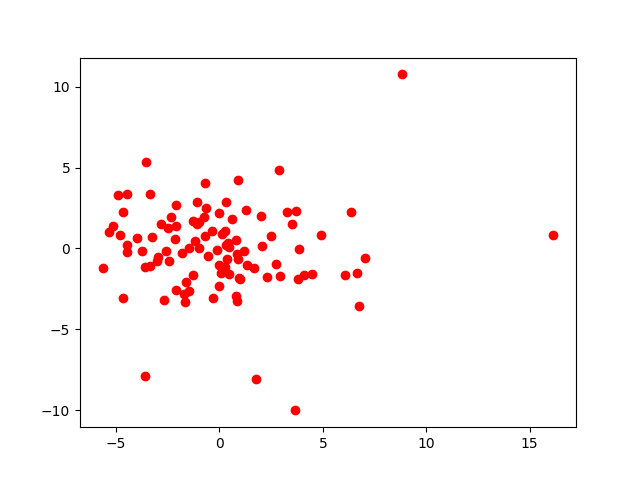

In [5]:
delta_ = PCA(2).fit_transform(delta)
from sklearn.manifold import TSNE
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot(delta_[:,0], delta_[:,1], 'ro')

## Clustering

0 64
1 64


<IPython.core.display.Javascript object>


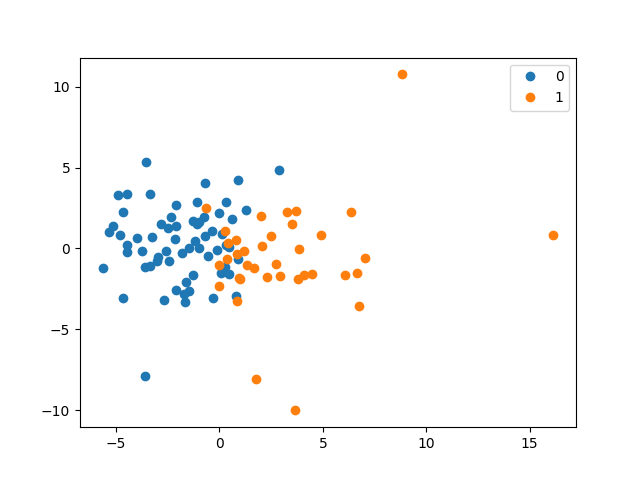

In [42]:
from sklearn.cluster import KMeans
y = KMeans(n_clusters=2, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)

<IPython.core.display.Javascript object>


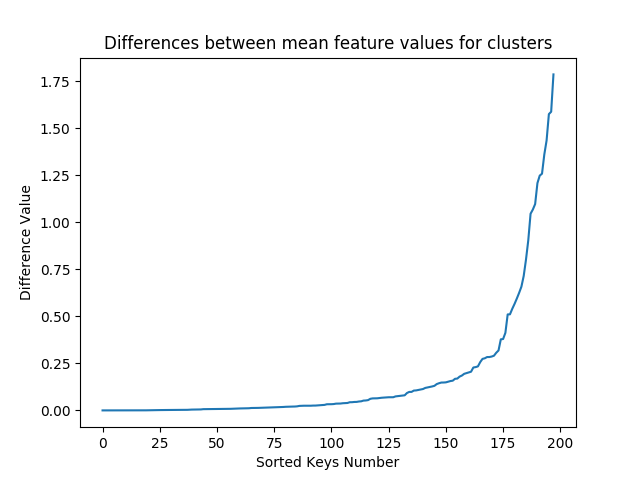

Text(0, 0.5, 'Difference Value')

In [7]:
cluster_delta = list((D[0]-D[1])**2)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [8]:
m = 0.5*max(((D[0]-D[1])**2))
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
keys[main_keys]

Number of Main Keys 12


Index(['Часть речи: глагол',
       'Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)',
       'Часть речи: частица', 'Сем. связь: DLB', 'Доля глаголов 1 лица',
       'Сем. роль: делибератив',
       'Доля глаголов прошедшего времени, первого лица, единственного числа',
       'Часть речи: прилагательное', 'Часть речи: существительное',
       'Средняя длина слов (в количестве символов)', 'Коэффициент Трейгера',
       'Часть речи: местоимение-существительное'],
      dtype='object')

In [28]:
def f(delta_, delta, n = 10):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(m[i], M[i], n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = (frust-calm)[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Часть речи: глагол


<IPython.core.display.Javascript object>


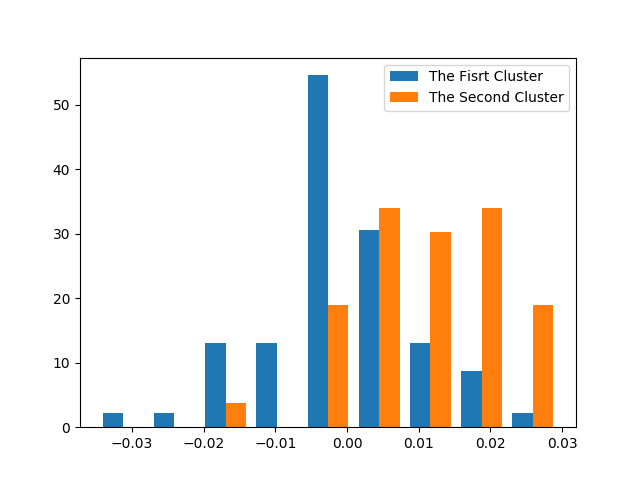

In [29]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

1 Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)


<IPython.core.display.Javascript object>


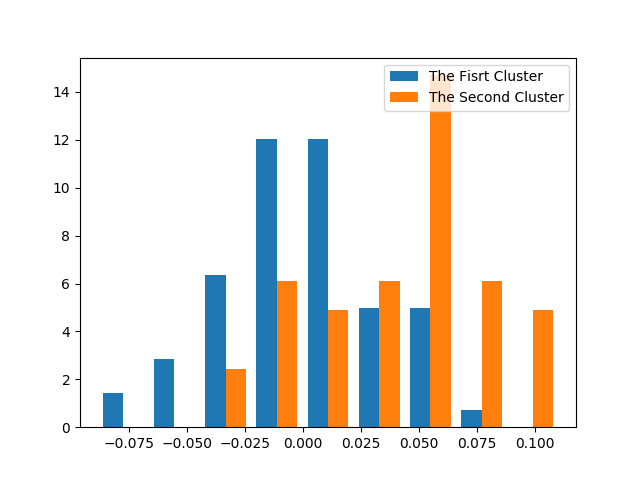

In [30]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

2 Часть речи: частица


<IPython.core.display.Javascript object>


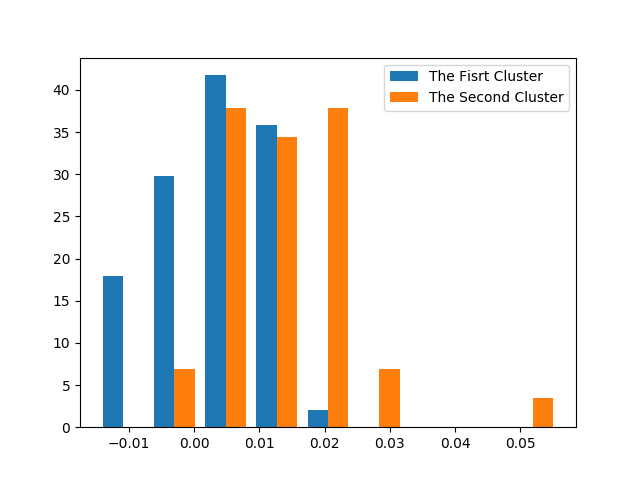

In [31]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

3 Сем. связь: DLB


<IPython.core.display.Javascript object>


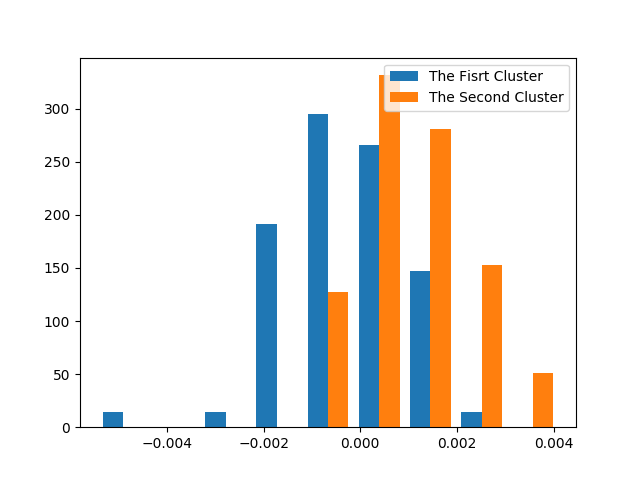

In [32]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

4 Доля глаголов 1 лица


<IPython.core.display.Javascript object>


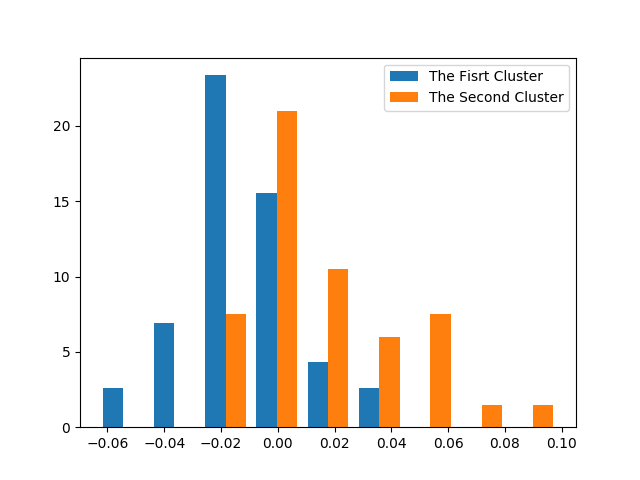

In [33]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

5 Сем. роль: делибератив


<IPython.core.display.Javascript object>


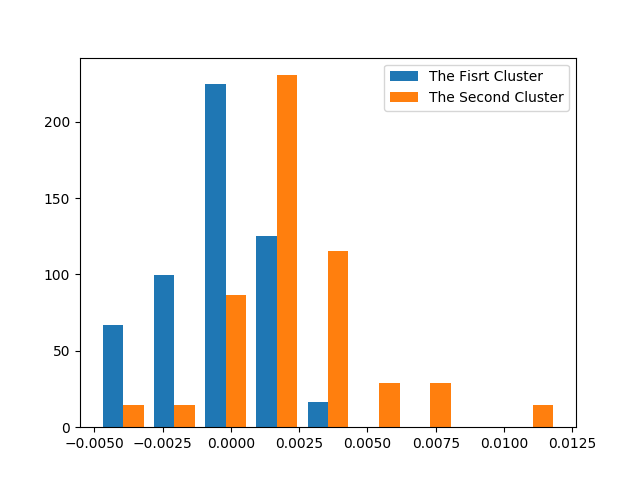

In [34]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

6 Доля глаголов прошедшего времени, первого лица, единственного числа


<IPython.core.display.Javascript object>


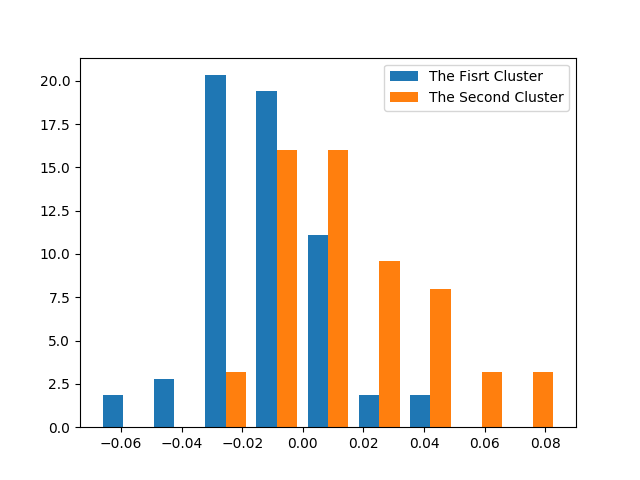

In [35]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

7 Часть речи: прилагательное


<IPython.core.display.Javascript object>


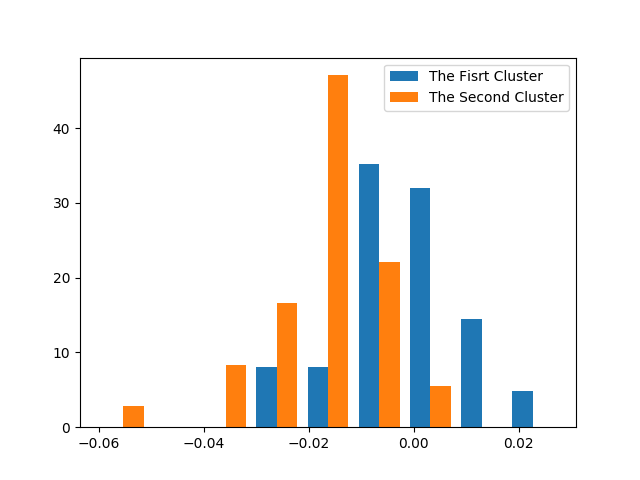

In [36]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

8 Часть речи: существительное


<IPython.core.display.Javascript object>


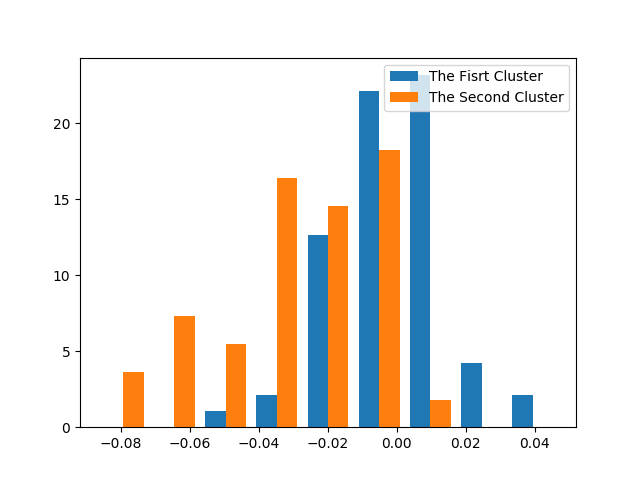

In [37]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

9 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


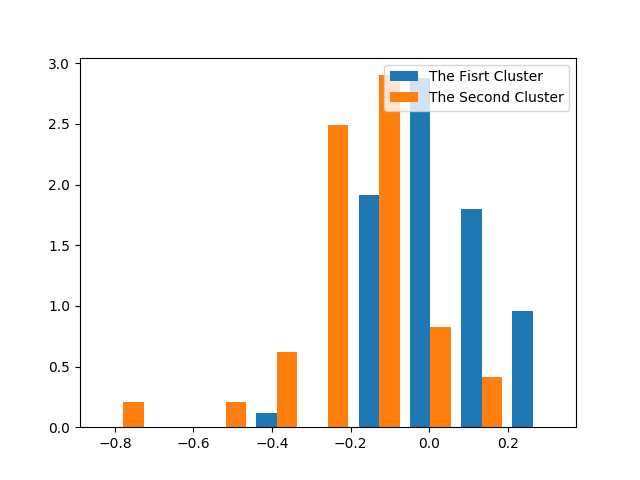

In [38]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

10 Коэффициент Трейгера


<IPython.core.display.Javascript object>


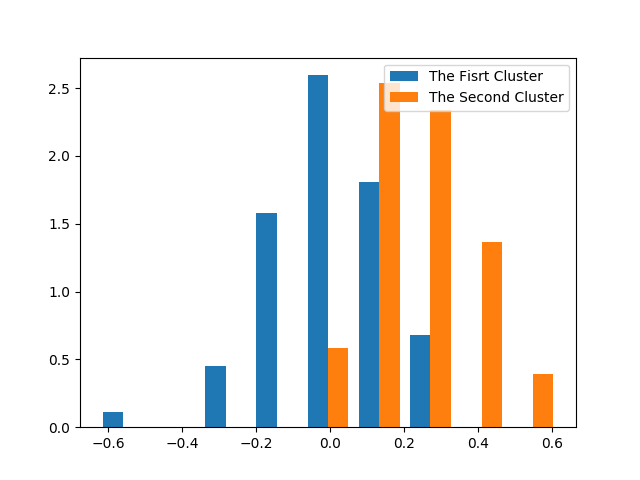

In [39]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

11 Часть речи: местоимение-существительное


<IPython.core.display.Javascript object>


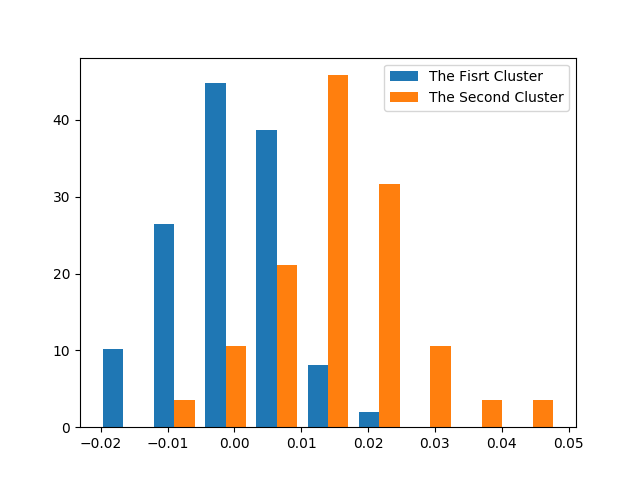

In [40]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

## Тональность

In [406]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = [i for i in calm.columns if 'Тональность' in i]
calm, frust = calm[keys].values, frust[keys].values
delta = calm-frust

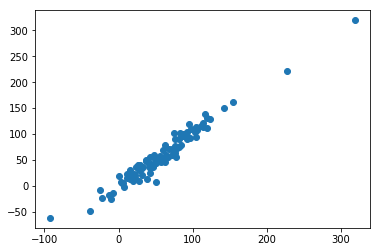

In [407]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(delta[:, 0], delta[:, 1], 'o')